In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
import yfinance as yf
import datetime as dt

stock = "POWERGRID.NS"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2024, 11, 1)

df = yf.download(stock, start, end)


C:\Users\junai\AppData\Local\Temp\ipykernel_14668\2592194838.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,32.385582,35.250709,26.768003,28.908800,855215656
2007-10-08,30.727669,33.480121,30.534513,33.480121,126671715
2007-10-09,32.820175,33.109906,29.085854,30.743763,116725709
2007-10-10,33.125996,33.802037,32.836265,33.673266,67931378
2007-10-11,36.828125,38.630901,32.836267,38.630901,106320954


In [4]:
df.shape

(4208, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4208 entries, 2007-10-05 to 2024-10-31
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4208 non-null   float64
 1   (High, POWERGRID.NS)    4208 non-null   float64
 2   (Low, POWERGRID.NS)     4208 non-null   float64
 3   (Open, POWERGRID.NS)    4208 non-null   float64
 4   (Volume, POWERGRID.NS)  4208 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 197.2 KB


In [6]:
df.isnull().sum()

Price   Ticker      
Close   POWERGRID.NS    0
High    POWERGRID.NS    0
Low     POWERGRID.NS    0
Open    POWERGRID.NS    0
Volume  POWERGRID.NS    0
dtype: int64

In [7]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4208.000000,4208.000000,4208.000000,4208.000000,4.208000e+03
mean,79.255946,80.286305,78.238144,79.292804,1.188963e+07
std,63.621687,64.365266,62.829875,63.603316,2.061999e+07
min,18.908407,20.212435,16.952366,20.114632,0.000000e+00
25%,36.349706,36.923188,35.812870,36.386935,4.799653e+06
50%,55.232328,55.870057,54.493152,55.338369,8.344398e+06
75%,82.704773,83.691960,81.724072,82.727268,1.362032e+07
max,356.113861,356.893408,348.074624,354.749603,8.552157e+08


In [8]:
df = df.reset_index()

In [9]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [10]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,2007-10-05,32.385582,35.250709,26.768003,28.908800,855215656
1,2007-10-08,30.727669,33.480121,30.534513,33.480121,126671715
2,2007-10-09,32.820175,33.109906,29.085854,30.743763,116725709
3,2007-10-10,33.125996,33.802037,32.836265,33.673266,67931378
4,2007-10-11,36.828125,38.630901,32.836267,38.630901,106320954


In [11]:
df.to_csv('../data/powergrid.csv')

In [12]:
data01 = pd.read_csv('../data/powergrid.csv')

In [13]:
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,32.385581970214844,35.250708662549606,26.76800292891584,28.908800170638344,855215656
2,1,2007-10-08,30.72766876220703,33.48012071257007,30.534513396740614,33.48012071257007,126671715
3,2,2007-10-09,32.82017517089844,33.10990603070133,29.085854182395227,30.743762670622203,116725709
4,3,2007-10-10,33.12599563598633,33.80203707612887,32.836264837746604,33.67326613443213,67931378


In [14]:
# candlestick

import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'], 
                                    high = data01['High'],
                                    low = data01['Low'], 
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [16]:
df = df.drop(['Date'], axis = 1)

C:\Users\junai\AppData\Local\Temp\ipykernel_14668\1002300862.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [17]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,32.385582,35.250709,26.768003,28.908800,855215656
1,30.727669,33.480121,30.534513,33.480121,126671715
2,32.820175,33.109906,29.085854,30.743763,116725709
3,33.125996,33.802037,32.836265,33.673266,67931378
4,36.828125,38.630901,32.836267,38.630901,106320954


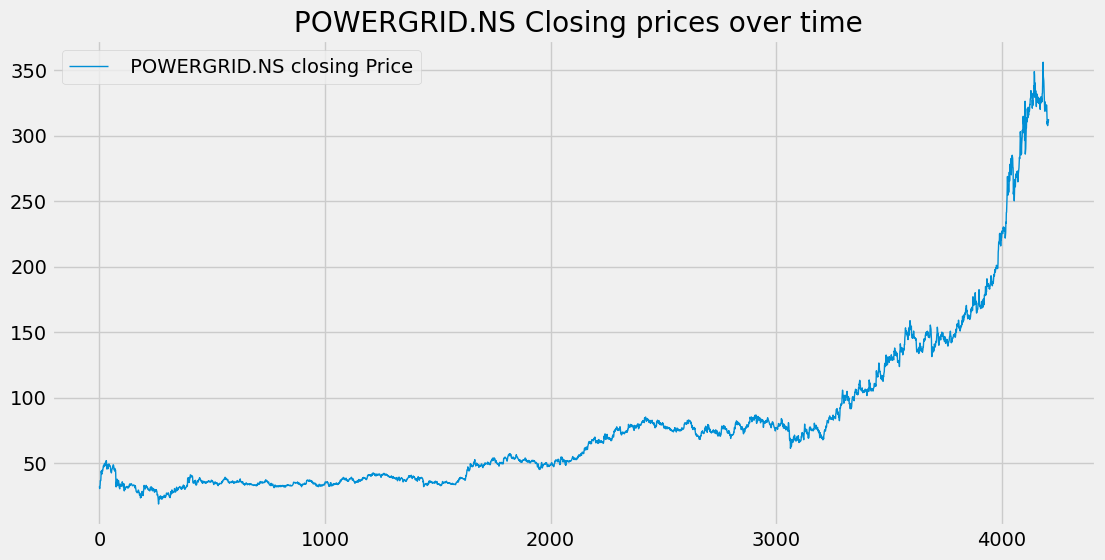

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f' {stock} closing Price', linewidth = 1)
plt.title(f' {stock} Closing prices over time')
plt.legend()
plt.show()

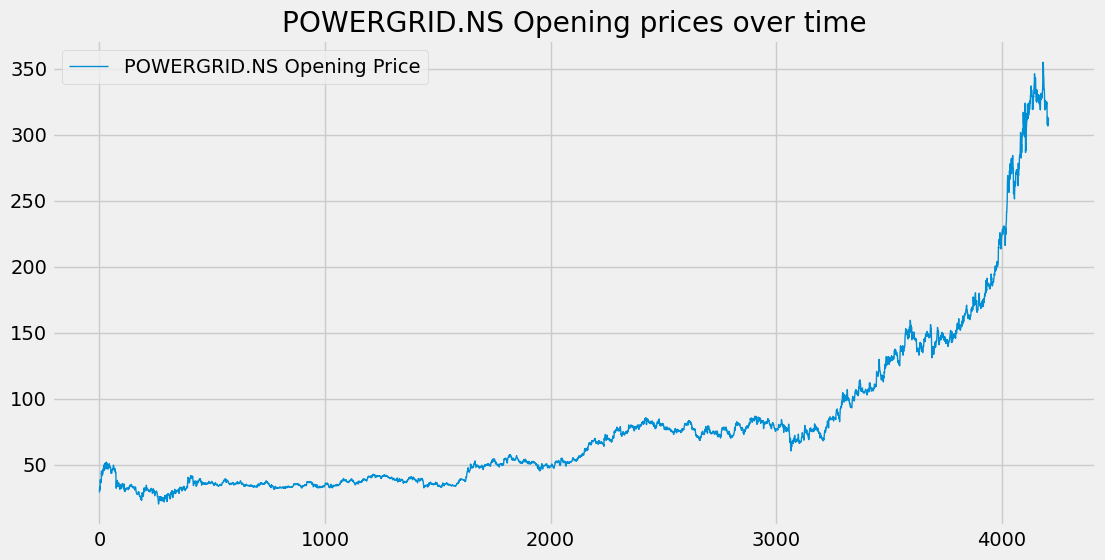

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

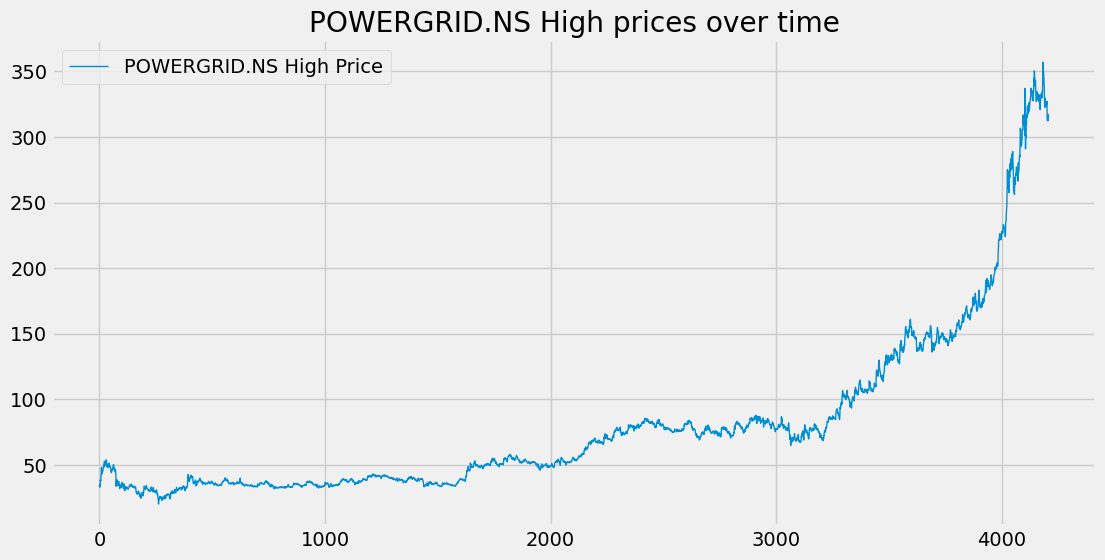

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

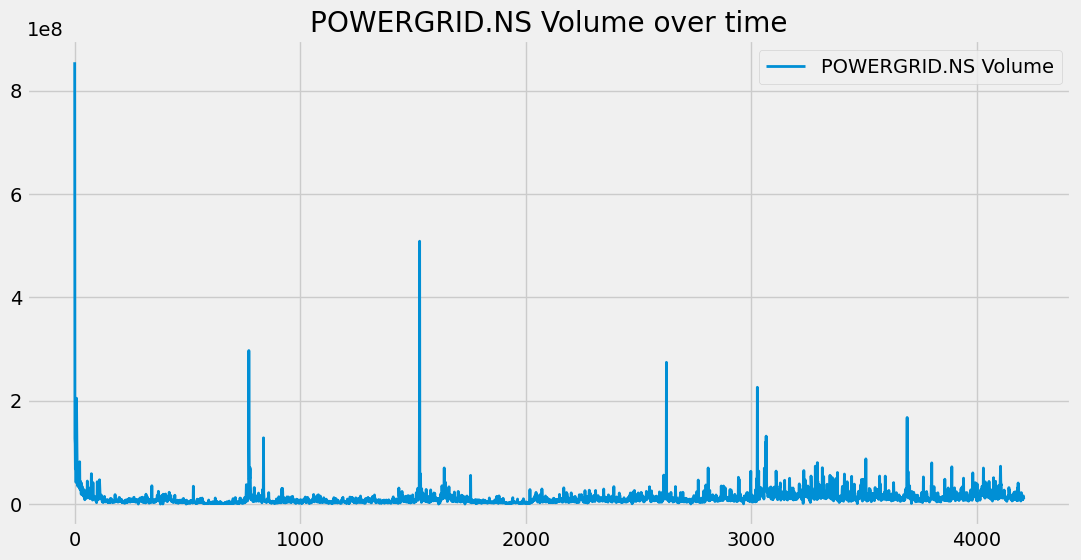

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()